Importing the required libraries like
pandas,seaborn,matplotlib,numpy etc......

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd

Matplotlib is building the font cache; this may take a moment.


Importing the Dataset

In [2]:
df = pd.read_csv('Netflix.csv')
df

,index,id,title,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes
0,0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,tt0075314,8.3,795222.0
1,1,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,tt0071853,8.2,530877.0
2,2,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,tt0079470,8.0,392419.0
3,3,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,tt0070047,8.1,391942.0
4,4,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,tt0063929,8.8,72895.0
...,...,...,...,...,...,...,...,...,...,...,...
5278,5278,tm1040816,Momshies! Your Soul is Mine,MOVIE,Three women with totally different lives accid...,2021,NaN,108,tt14412240,5.8,26.0
5279,5279,tm1014599,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,NaN,100,tt13857480,6.9,39.0
5280,5280,tm1045018,Clash,MOVIE,A man from Nigeria returns to his family in Ca...,2021,NaN,88,tt14620732,6.5,32.0
5281,5281,tm1098060,Shadow Parties,MOVIE,A family faces destruction in a long-running c...,2021,NaN,116,tt10168094,6.2,9.0


Removing the irrelevent columns/Datas

In [3]:
df = df.drop( columns=['id','title','index','type','description','age_certification','imdb_id'], axis = 1)
df

,release_year,runtime,imdb_score,imdb_votes
0,1976,113,8.3,795222.0
1,1975,91,8.2,530877.0
2,1979,94,8.0,392419.0
3,1973,133,8.1,391942.0
4,1969,30,8.8,72895.0
...,...,...,...,...
5278,2021,108,5.8,26.0
5279,2021,100,6.9,39.0
5280,2021,88,6.5,32.0
5281,2021,116,6.2,9.0


Renaming the titles for easy to use

In [4]:
df = df.rename( columns= {'imdb_score':'Score','imdb_votes':'Votes','runtime':'Runtime','release_year':'Year'})
df

,Year,Runtime,Score,Votes
0,1976,113,8.3,795222.0
1,1975,91,8.2,530877.0
2,1979,94,8.0,392419.0
3,1973,133,8.1,391942.0
4,1969,30,8.8,72895.0
...,...,...,...,...
5278,2021,108,5.8,26.0
5279,2021,100,6.9,39.0
5280,2021,88,6.5,32.0
5281,2021,116,6.2,9.0


Removing the Duplicate values

In [5]:
print(df[df.duplicated()])
df.count()

Empty DataFrame
Columns: [Year, Runtime, Score, Votes]
Index: []


Year       5283
Runtime    5283
Score      5283
Votes      5267
dtype: int64

In [6]:
df.drop_duplicates()
df.count()

Year       5283
Runtime    5283
Score      5283
Votes      5267
dtype: int64

Removing the null values

In [7]:
df.isnull().sum()

Year        0
Runtime     0
Score       0
Votes      16
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
df.isnull().sum()

Year       0
Runtime    0
Score      0
Votes      0
dtype: int64

In [10]:
df.count()

Year       5267
Runtime    5267
Score      5267
Votes      5267
dtype: int64

Detecting outliers

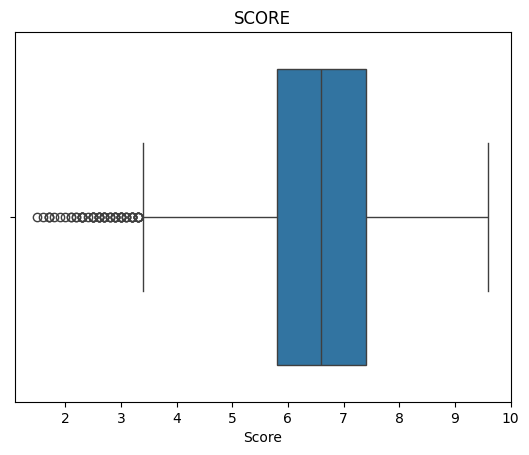

In [11]:
sns.boxplot(data=df,x='Score')
plt.title("SCORE")
plt.show()

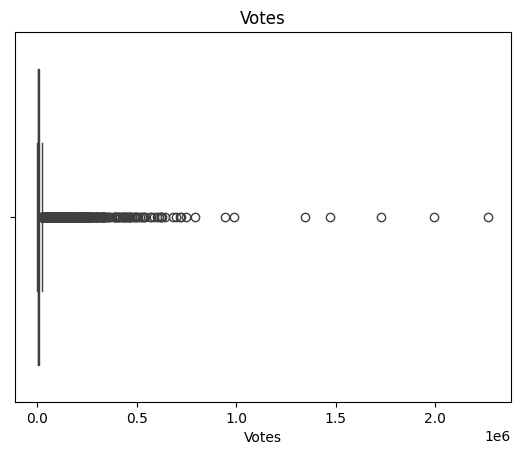

In [12]:
sns.boxplot(data=df,x="Votes")
plt.title("Votes")
plt.show()

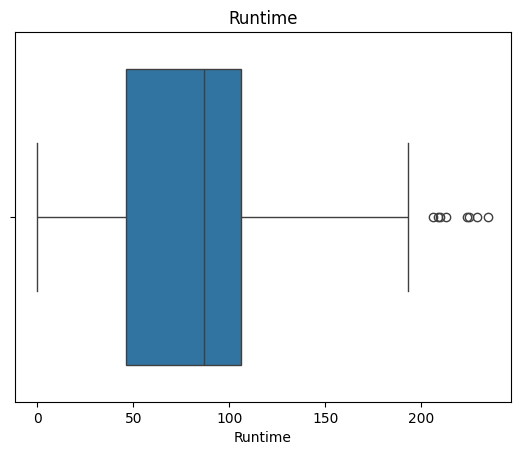

In [13]:
sns.boxplot(data=df,x="Runtime")
plt.title("Runtime")
plt.show()

Removing the outliers

In [14]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Year          5.0
Runtime      60.0
Score         1.6
Votes      9623.0
dtype: float64


In [15]:
A = df < (Q1 - 1.5 * IQR)
B = df > (Q3 + 1.5 * IQR)
df = df[~(A | B).any(axis=1)]

Now make a correlation heatmap

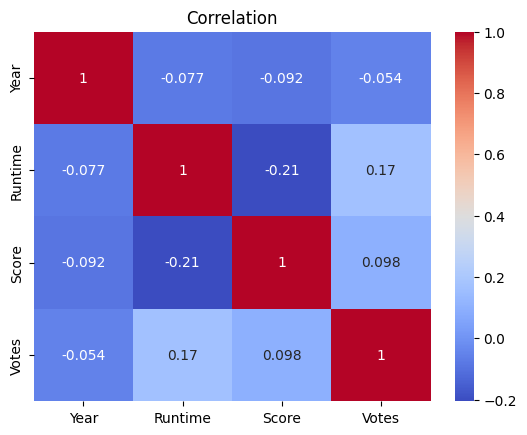

In [16]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot = True, cmap="coolwarm")
plt.title("Correlation")
plt.show()

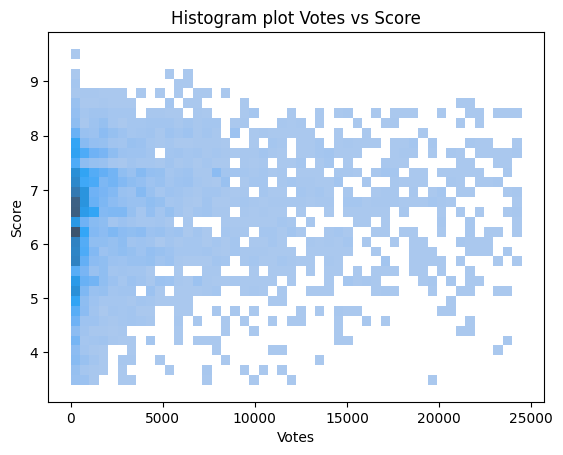

In [19]:
sns.histplot(x='Votes', y = 'Score', data = df)
plt.title('Histogram plot Votes vs Score')
plt.show()

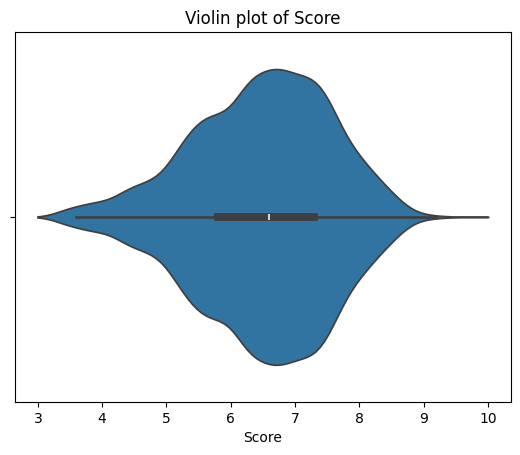

In [20]:
sns.violinplot(x='Score', data=df)
plt.title("Violin plot of Score")
plt.show()

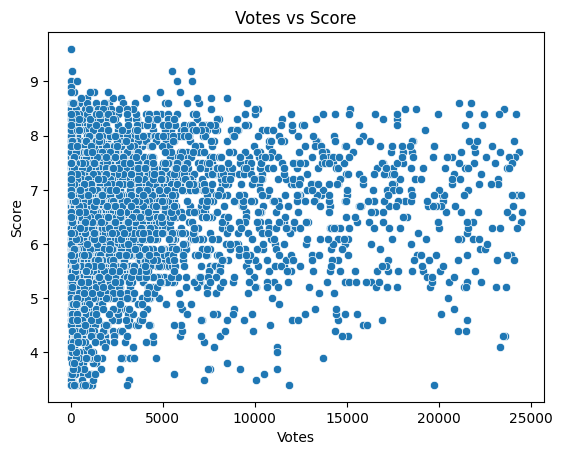

In [23]:
sns.scatterplot(x='Votes', y='Score', data=df)
plt.title("Votes vs Score")
plt.show()

Now we find that the best correlation is between the " Votes " and the " Scores " 

Importing the needed libraries for the Model

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix